In [44]:
# from __future__ import division
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')

../input/train.csv
../input/test.csv
../input/googleplaystore.csv
../input/googleplaystore_user_reviews.csv
../input/data.csv
../input/nbhoods/nynta.csv
../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
../input/nyc-subway-stations/DOITT_SUBWAY_STATION_01_13SEPT2010.csv


1. Preparing data

In [45]:
data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 16
Number of examples: 48895


In [46]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [47]:
# I want to describe only columns which contain numerical values

data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], axis=1).describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [48]:
# Printing unique values for string columns

for col in data[['neighbourhood_group', 'neighbourhood', 'room_type']]:
    print('Unique values in column: %s' %col)
    print(data[col].unique()), '\n'

Unique values in column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason 

2. Null values

In [49]:
print('Null values in Airbnb dataset: \n')
print(data.isnull().sum())
print('\n')
print('Percentage of null values in review columns: ')
print(round(data['last_review'].isnull().sum()/len(data)*100, 2),"%")

# For reviews there are many null values so i want to also see percentage to the whole dataset
# Null values in name, host_name, last_review, reviews_per_month, which for reviews is the same amount. 
# I want to see if it is for the same rows
# I want to see also how null values for name and host_name are distributed because these amounts are different

Null values in Airbnb dataset: 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Percentage of null values in review columns: 
20.56 %


<AxesSubplot:title={'center':'Null values in last_review and reviews_per_month'}>

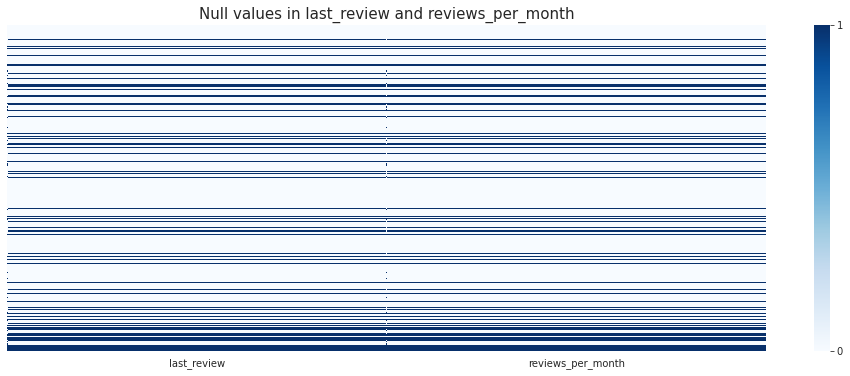

In [50]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(data[['last_review','reviews_per_month' ]].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})

In [51]:
null_name = (pd.DataFrame(np.where((data['name'].isnull())))).transpose()
null_host_name = (pd.DataFrame(np.where((data['host_name'].isnull())))).transpose()

sum_null = pd.concat([null_name,null_host_name], axis=1, ignore_index=True)
sum_null.columns = ['Null rows in name', 'Null rows in host_name']
sum_null

# Null values in name and host_name columns are accidental

Null rows in name  Null rows in host_name
0              2854.0                     360
1              3703.0                    2700
2              5775.0                    5745
3              5975.0                    6075
4              6269.0                    6582
5              6567.0                    8163
6              6605.0                    8257
7              8841.0                    8852
8             11963.0                    9138
9             12824.0                    9817
10            13059.0                   14040
11            13401.0                   14631
12            15819.0                   15174
13            16071.0                   19565
14            18047.0                   27777
15            28889.0                   27962
16                NaN                   28042
17                NaN                   28274
18                NaN                   30570
19                NaN                   32193
20                NaN                   38992

In [52]:
# last_review column may be dropped

data.drop('last_review', axis=1, inplace=True)

In [53]:
# Null values for name and host_name I replace with 0. Also reviews_per_month I replace with 0

data['name'].fillna(value=0, inplace=True)

In [54]:
data['host_name'].fillna(value=0, inplace=True)

In [55]:
data['reviews_per_month'].fillna(value=0, inplace=True)

In [56]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [57]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

3. Evaluations

In [58]:
# Evaluation 1 - top 3 hosts; hosts with the biggest amount of listings

top_3_hosts = (pd.DataFrame(data.host_id.value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['host_id'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

Listings    host_id
0       327  219517861
1       232  107434423
2       121   30283594

In [59]:
# Evaluation 2 - top 3 the hottest neighbourhoood groups

top_3_neigh = pd.DataFrame(data['neighbourhood_group'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

Listings Neighbourhood Group
0     21661           Manhattan
1     20104            Brooklyn
2      5666              Queens

In [60]:
# Evaluation 3 - average price, availability in year 

average_price_ava = pd.DataFrame(data[['price', 'availability_365']].describe())
average_price_ava.columns=['Price', 'Availability in a year']
average_price_ava

Price  Availability in a year
count  48895.000000            48895.000000
mean     152.720687              112.781327
std      240.154170              131.622289
min        0.000000                0.000000
25%       69.000000                0.000000
50%      106.000000               45.000000
75%      175.000000              227.000000
max    10000.000000              365.000000

In [61]:
# Evaluation 4 - most reviewed hosts

rev_group = pd.DataFrame(data.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Number of reviews'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed

Host ID  Number of reviews
0  47621202                629
1   4734398                607
2   4734398                597

In [62]:
# Evaluation 5 - the most reviewed hosts per month

gr = pd.DataFrame(data.groupby('reviews_per_month').sum()['host_id'])
rev = (gr.sort_values('reviews_per_month',ascending=False)).head(3)
rev.columns = ['Host ID']
rev['Reviews per month'] = rev.index
rev.reset_index(drop=True, inplace=True)
rev

Host ID  Reviews per month
0  244361589              58.50
1  244361589              27.95
2  228415932              20.94

In [63]:

# Evaluation 6 - prices in every neighbourhood group

# Brooklyn
nei1 = data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_nei1 = nei1[['price']]
# Manhattan
nei2 = data.loc[data['neighbourhood_group'] == 'Manhattan']
price_nei2 = nei2[['price']]
# Queens
nei3 = data.loc[data['neighbourhood_group'] == 'Queens']
price_nei3 = nei3[['price']]
# Staten Island
nei4 = data.loc[data['neighbourhood_group'] == 'Staten Island']
price_nei4 = nei4[['price']]
# Bronx
nei5 = data.loc[data['neighbourhood_group'] == 'Bronx']
price_nei5 = nei5[['price']]

price_list = [price_nei1, price_nei2, price_nei3, price_nei4, price_nei5]



price_stats = []
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# price statistics for every neighbourhood

for x in price_list:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': nei_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': nei_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': nei_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': nei_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': nei_list[4]}, inplace=True)

# final view of dataframe

stats_df = price_stats
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

4. Visualisations

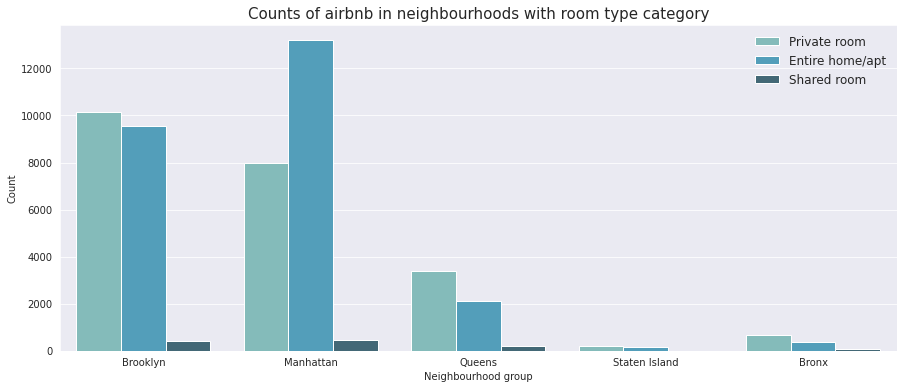

In [64]:
# Visualisation 1 - Neighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

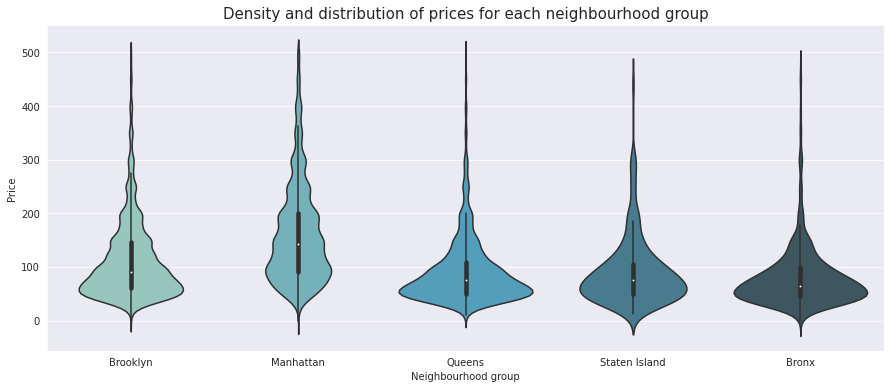

In [65]:
# Visualisation 2 - distribution of prices

plt.figure(figsize=(15,6))
sns.violinplot(data=data[data.price <500], x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

<Figure size 1080x432 with 0 Axes>

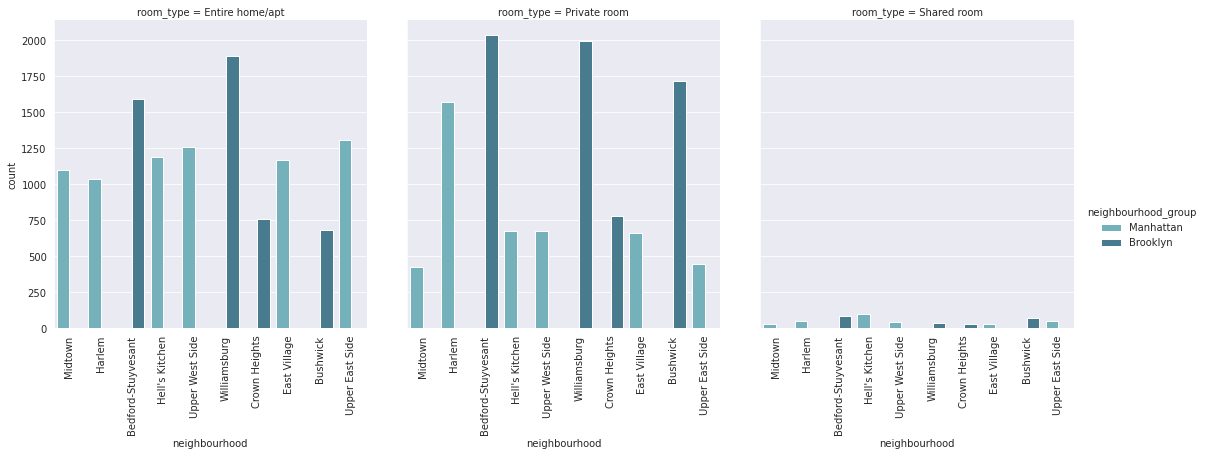

In [66]:
# Visualisation 3 - top neighbourhoods with category of room type

top_nei = data['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index'].tolist()

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=data.loc[data['neighbourhood'].isin(top_nei)], kind='count', palette='GnBu_d')
vis_3.set_xticklabels(rotation=90)

Text(0, 0.5, 'Count')

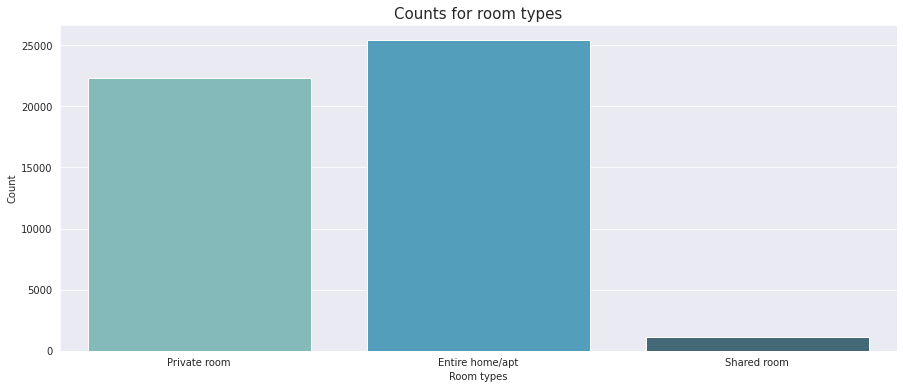

In [67]:
# Visualisation 4 - room types

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='room_type', palette='GnBu_d')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

Text(0, 0.5, 'Frequency')

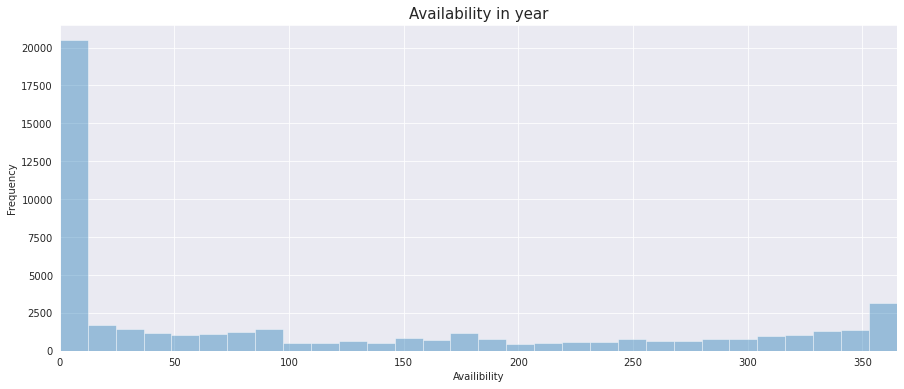

In [68]:
# Visualisation 5 - availability in year

plt.figure(figsize=(15,6))
sns.distplot(data.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

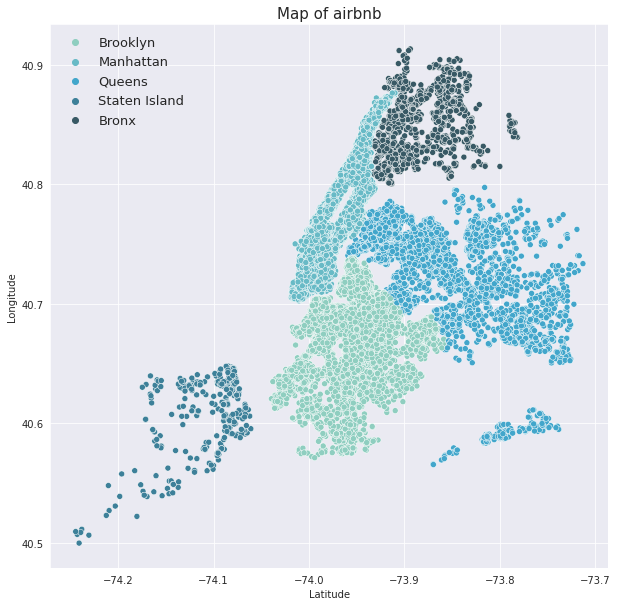

In [69]:
# Visualisation 6 - map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

<AxesSubplot:>

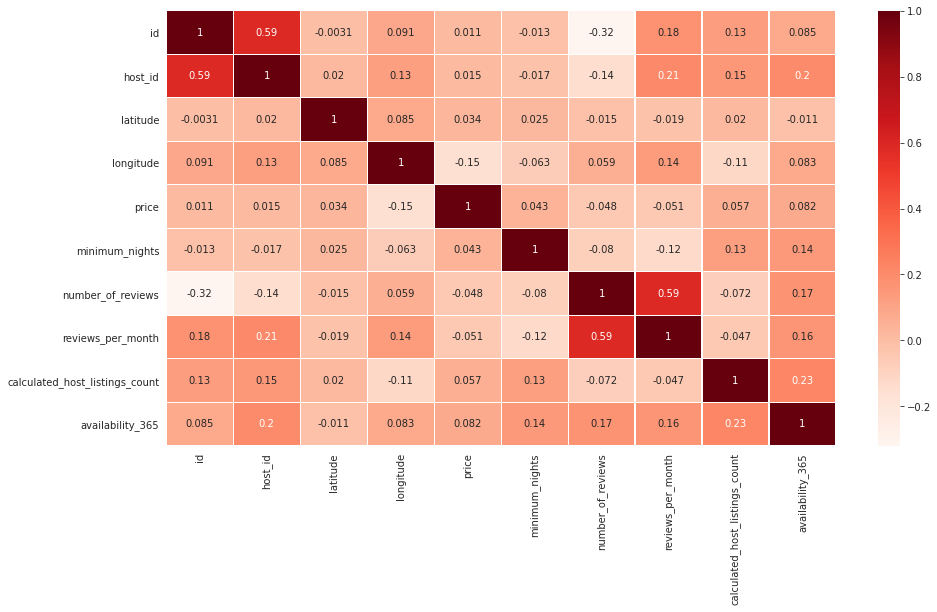

In [70]:
# Visualisation 7 - correlations between values

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='Reds')

In [71]:
# Visualisation 8 - prices in neighbourhoods 

data1 = pd.DataFrame(data.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean())
data1.reset_index(inplace=True)

bronx = (data1[data1['neighbourhood_group'] =='Bronx']).sort_values(by='price',ascending=False).head(10)
brooklyn = (data1[data1['neighbourhood_group'] =='Brooklyn']).sort_values(by='price',ascending=False).head(10)
manhattan = (data1[data1['neighbourhood_group'] =='Manhattan']).sort_values(by='price',ascending=False).head(10)
queens = (data1[data1['neighbourhood_group'] =='Queens']).sort_values(by='price',ascending=False).head(10)
staten = (data1[data1['neighbourhood_group'] =='Staten Island']).sort_values(by='price',ascending=False).head(10)

neighs = [bronx, brooklyn, manhattan, queens, staten]
titles = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

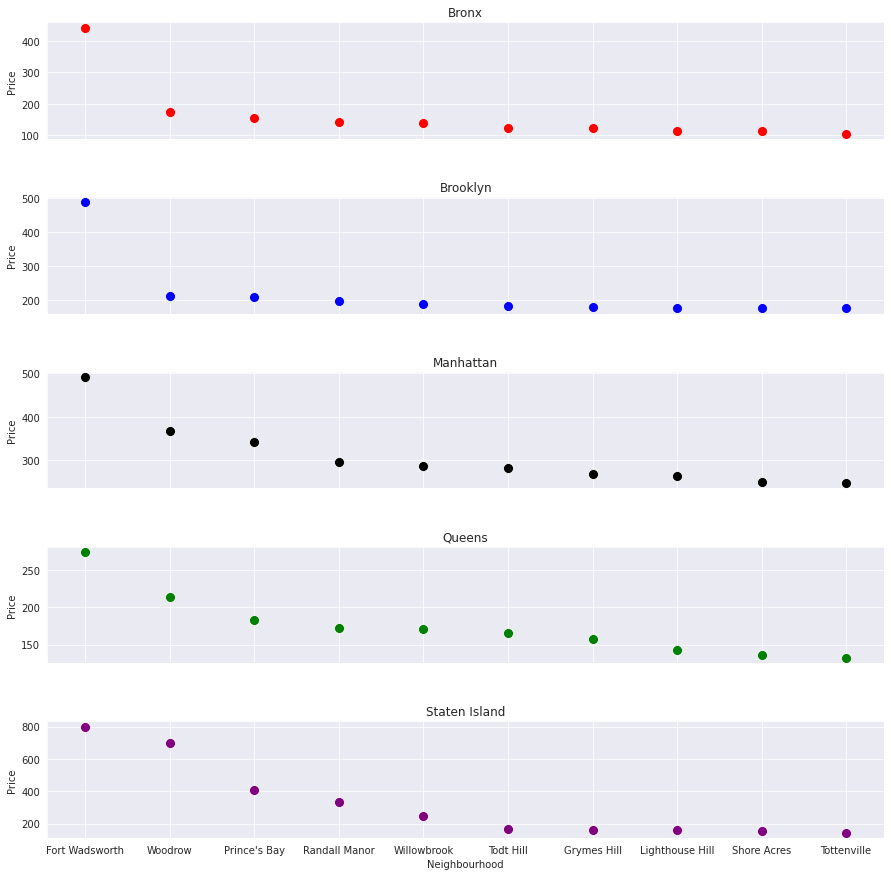

In [72]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.scatterplot(data=bronx, x='neighbourhood', y='price', ax=axs[0], color='red', s=100)
sns.scatterplot(data=brooklyn, x='neighbourhood', y='price', ax=axs[1], color='blue', s=100)
sns.scatterplot(data=manhattan, x='neighbourhood', y='price', ax=axs[2], color='black', s=100)
sns.scatterplot(data=queens, x='neighbourhood', y='price', ax=axs[3], color='green', s=100)
sns.scatterplot(data=staten, x='neighbourhood', y='price', ax=axs[4], color='purple', s=100)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='Neighbourhood', ylabel='Price')
    ax.label_outer()

5. Predictions

In [73]:
# Preparing dataset for predictions

data_pred = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [74]:
data_pred.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [75]:
data_pred.drop(['name', 'host_name', 'last_review', 'id'], inplace=True, axis=1)

In [76]:
data_pred['reviews_per_month'] = data_pred['reviews_per_month'].fillna(value=0, inplace=False)

In [77]:
data_pred.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [78]:
le = preprocessing.LabelEncoder()

le.fit(data_pred['neighbourhood_group'])
data_pred['neighbourhood_group']=le.transform(data_pred['neighbourhood_group'])

le.fit(data_pred['neighbourhood'])
data_pred['neighbourhood']=le.transform(data_pred['neighbourhood'])

le.fit(data_pred['room_type'])
data_pred['room_type']=le.transform(data_pred['room_type'])

In [79]:
data_pred.sort_values('price', ascending=True, inplace=True)

In [80]:
data_pred = data_pred[11:-6]

In [81]:
lm = LinearRegression()

In [82]:
X = data_pred.drop(['price', 'longitude'], inplace=False, axis=1)
y = data_pred['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train, y_train)

LinearRegression()

In [83]:
predictions = lm.predict(X_test)

In [84]:
# Evaluated metrics

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 76.12984118966259
MSE (Mean Squared Error): 42229.032301080886
RMSE (Root mean squared error): 205.49703720754925
R2 score: 0.09138535240632706


In [85]:
# Avtual vs predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

Actual Values  Predicted Values
0             85        127.025785
1             90        189.666365
2             50         72.411203
3             65         96.489395
4            450        157.853679
5             74         62.167818
6             80        116.745626
7            125         82.619808
8             72        111.386136
9             35         83.899589

Text(0, 0.5, 'Test')

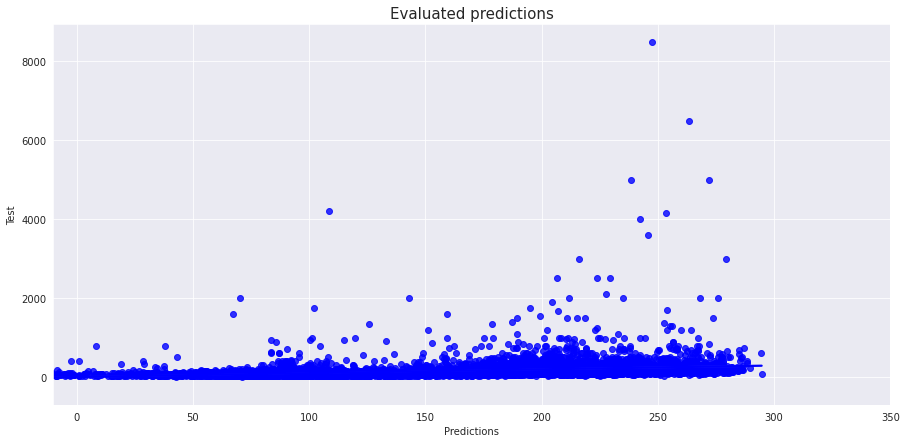

In [87]:
# Evaluated predictions

plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=predictions, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')